In [0]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)


def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]


def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sym.sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))

In [0]:
def plot_signals(xs, y, w_s, k):

    plt.stem(k*2*np.pi/w_s, xs)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])

    sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2))

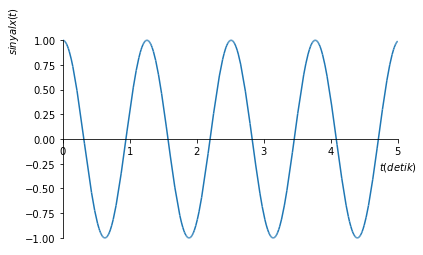

In [31]:
w_0 = 5
x = sym.cos(w_0 * t)

sym.plot(x, (t, 0, 5), xlabel=r'$t (detik)$', ylabel=r'$sinyal x(t)$')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


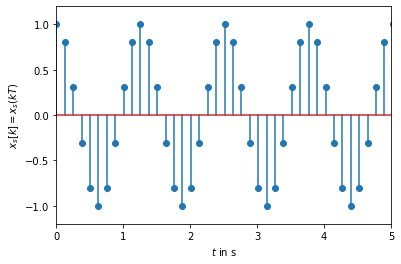

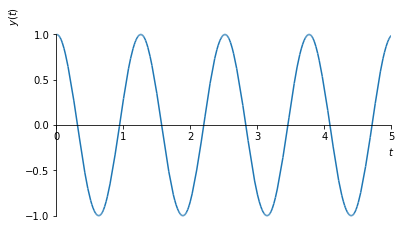

In [32]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


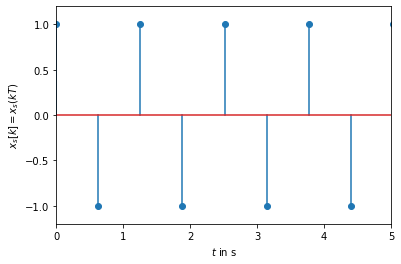

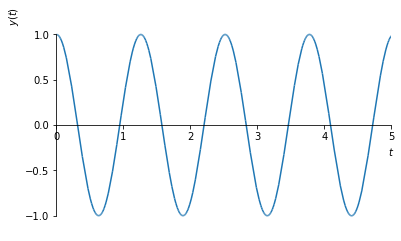

In [33]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


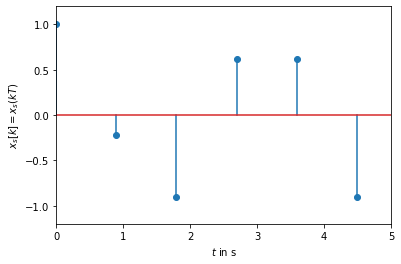

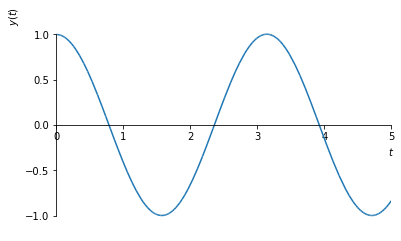

In [34]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

In [0]:
#https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Sampling_Theorem.ipynb
#Investigating The Sampling Theorem


%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'amplitude')

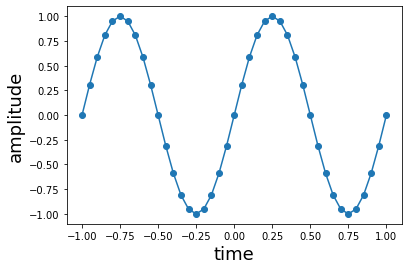

In [0]:
fig,ax = subplots()

f = 1.0  # Hz, signal frequency
fs = 20.0 # Hz, sampling rate (ie. >= 2*f) 
t = arange(-1,1+1/fs,1/fs) # sample interval, symmetric for convenience later
x = sin(2*pi*f*t)
ax.plot(t,x,'o-')
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

(0.09999999999999998, 0.4, 0, 1.1)

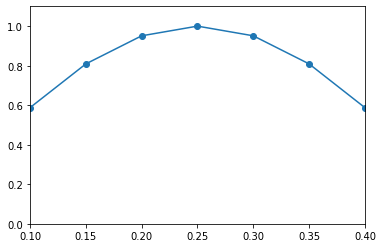

In [0]:
fig,ax = subplots()

ax.plot(t,x,'o-')
ax.axis( xmin = 1/(4*f)-1/fs*3, xmax = 1/(4*f)+1/fs*3, ymin = 0, ymax = 1.1 )
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

In [0]:
interval=[] # piecewise domains
apprx = []  # line on domains
# build up points *evenly* inside of intervals
tp = hstack([ linspace(t[i],t[i+1],20,False) for i in range(len(t)-1) ])
# construct arguments for piecewise2
for i in range(len(t)-1):
   interval.append( np.logical_and(t[i] <= tp,tp < t[i+1]))
   apprx.append( (x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = np.piecewise(tp,interval,apprx) # piecewise linear approximation

Text(0.5, 1.0, 'Errors with Piecewise Linear Interpolant')

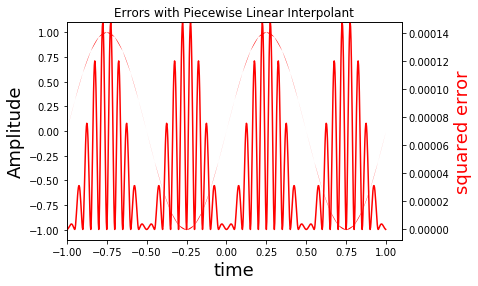

In [0]:
ax1 = figure().add_subplot(111)
ax1.fill_between(tp,x_hat,sin(2*pi*f*tp),facecolor='red')
ax1.set_xlabel('time',fontsize=18)
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx()
sqe = ( x_hat - sin(2*pi*f*tp))**2
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max() )
ax2.set_ylabel('squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant')

# ax1.figure.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'sampling rate=20.00 Hz')

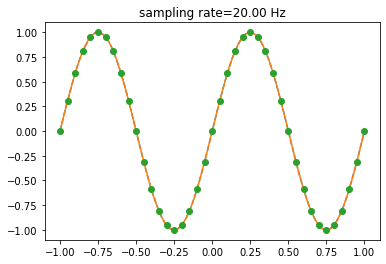

In [0]:
#rekonstruksi

ax = figure().add_subplot(111)
t = linspace(-1,1,100) # redefine this here for convenience
ts = arange(-1,1+1/fs,1/fs) # sample points
num_coeffs=len(ts) 
sm=0
for k in range(-num_coeffs,num_coeffs): # since function is real, need both sides
   sm+=sin(2*pi*(k/fs))*sinc( k - fs * t)
ax.plot( t,sm,'--',t,sin(2*pi*t),ts, sin(2*pi*ts),'o')
ax.set_title('sampling rate=%3.2f Hz' % fs )

# ax.figure.savefig('figure_00@.png', bbox_inches='tight', dpi=300)



Text(0.5, 1.0, 'Errors with sinc Interpolant')

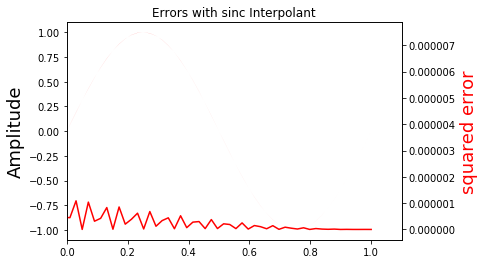

In [0]:
ax1 = figure().add_subplot(111)
ax1.fill_between(t,sm,sin(2*pi*f*t),facecolor='red')
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx()
sqe = (sm - sin(2*pi*f*t))**2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('squared error', color='r',fontsize=18)
ax1.set_title('Errors with sinc Interpolant')

# ax1.figure.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(-0.9, 0.5, 'tidak ada gangguan di sini')

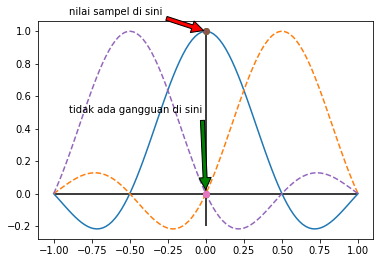

In [0]:
fig = figure()
ax = fig.add_subplot(111) # create axis handle
k=0
fs=2 # makes this plot easier to read
ax.plot (t,sinc( k - fs * t), 
         t,sinc( k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o',
         t,sinc( k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o'
)
ax.hlines(0,-1,1)
ax.vlines(0,-.2,1)
ax.annotate('nilai sampel di sini',
            xy=(0,1),
            xytext=(-1+.1,1.1),
            arrowprops={'facecolor':'red','shrink':0.05},
            )
ax.annotate('tidak ada gangguan di sini',
            xy=(0,0),
            xytext=(-1+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
            )

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

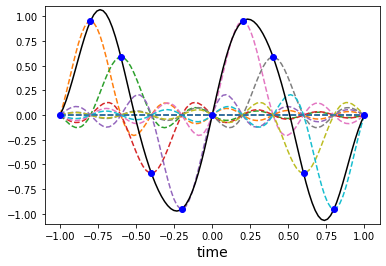

In [0]:
fs=5.0 # sampling rate
k=array(sorted(set((t*fs).astype(int)))) # sorted coefficient list
fig,ax = subplots()

ax.plot(t,(sin(2*pi*(k[:,None]/fs))*sinc(k[:,None]-fs*t)).T,'--', # individual whittaker functions
        t,(sin(2*pi*(k[:,None]/fs))*sinc(k[:,None]-fs*t)).sum(axis=0),'k-', # whittaker interpolant
     k/fs,sin(2*pi*k/fs),'ob')# samples
ax.set_xlabel('time',fontsize=14)
ax.axis((-1.1,1.1,-1.1,1.1));

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(3.1, 0.5, '... dan pergi...')

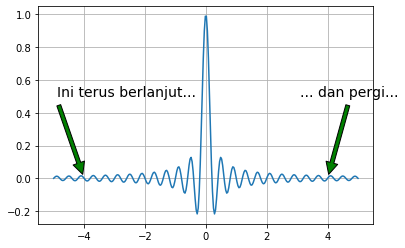

In [0]:
from __future__ import division

t = linspace(-5,5,300) # redefine this here for convenience

fig,ax = subplots()

fs=5.0
ax.plot(t,sinc(fs * t))
ax.grid()
ax.annotate('Ini terus berlanjut...',
            xy=(-4,0),
            xytext=(-5+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},fontsize=14)
ax.annotate('... dan pergi...',
            xy=(4,0),
            xytext=(3+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},fontsize=14)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

In [0]:
def kernel(x,sigma=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y = pi*where(x == 0,1.0e-20, x)
    return sin(sigma/2*y)/y

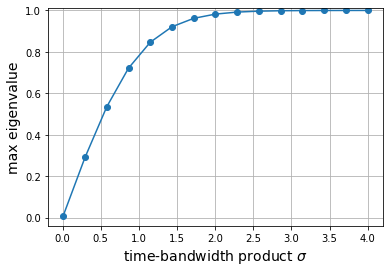

In [0]:
nstep=100                # quick and dirty integral quantization
t = linspace(-1,1,nstep) # quantization of time
dt = diff(t)[0]          # differential step size
def eigv(sigma):
    return eigvalsh(kernel(t-t[:,None],sigma)).max() # compute max eigenvalue

sigma = linspace(0.01,4,15) # range of time-bandwidth products to consider

fig,ax = subplots()
ax.plot(sigma, dt*array([eigv(i) for i in sigma]),'-o')
ax.set_xlabel('time-bandwidth product $\sigma$',fontsize=14)
ax.set_ylabel('max eigenvalue',fontsize=14)
ax.axis(ymax=1.01)
ax.grid()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'Eigenvector corresponding to e-value=0.9990;$\\sigma$=3.00')

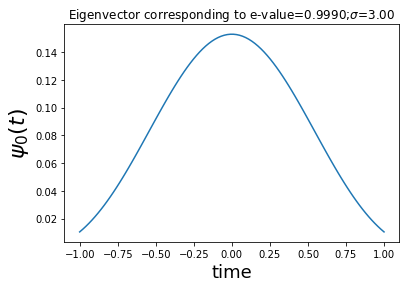

In [0]:
sigma=3
w,v=eigh(kernel(t-t[:,None],sigma))
maxv=v[:, w.argmax()]
fig,ax=subplots()
ax.plot(t,maxv)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('$\psi_0(t)$',fontsize=22)
ax.set_title('Eigenvector corresponding to e-value=%3.4f;$\sigma$=%3.2f'%(w.max()*dt,sigma))

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'Comparison of $0^{th}$ prolate function')

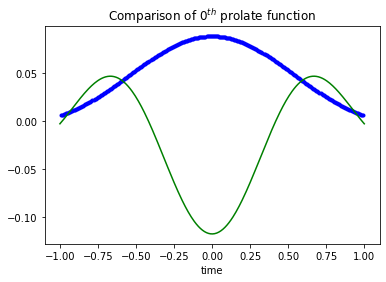

In [0]:
import scipy.special

# quick definition to clean up the function signature and normalize
def pro(t,k=0,sigma=3): 
    'normalized prolate angular spherioidal wave function wrapper'
    tmp= scipy.special.pro_ang1(0,k,pi/2*sigma,t)[0] #kth prolate function
    den=linalg.norm(tmp[np.logical_not( np.isnan(tmp))])# drop those pesky NaNs at edges
    return tmp/den # since e-vectors are likewise normalized

fig,ax=subplots()

ax.plot(t,pro(t),'b.',t,maxv,'-g');
ax.set_xlabel('time')
ax.set_title('Comparison of $0^{th}$ prolate function')


# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(0.5, 0, 'time')

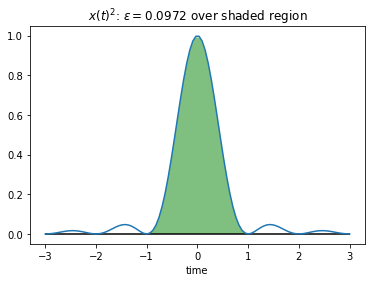

In [0]:
W=1/2 # take bandwidth = 1 Hz. This makes the total signal power=1
# compute epsilon for this time-extent
epsilon=1 - 2/pi*scipy.special.sici( 2*pi )[0] # using sin-integral special function

fig,ax = subplots()

t = linspace(-3,3,100)
ax.plot(t,sinc(t)**2)
ax.hlines(0,-3,3)
tt = linspace(-1,1,20)
ax.fill_between(tt,0,sinc(tt)**2,facecolor='g',alpha=0.5)
ax.set_title('$x(t)^2$: $\epsilon=%2.4f$ over shaded region' % epsilon)
ax.set_xlabel('time')

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(0.5, 0, 'time')

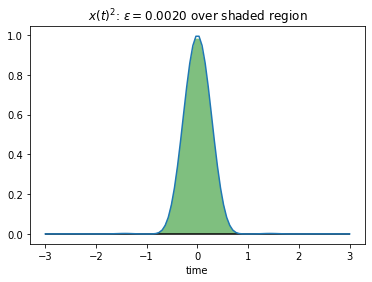

In [0]:
epsilon= 2/3. + 4/3/pi*scipy.special.sici(2*pi)[0]-8/3/pi*scipy.special.sici(4*pi)[0] # total energy is 2/3 in this case

fig,ax = subplots()
t = linspace(-3,3,100)
ax.plot(t,sinc(t)**4)
ax.hlines(0,-3,3)
tt = linspace(-1,1,20)
ax.fill_between(tt,0,sinc(tt)**4,facecolor='g',alpha=0.5)
ax.set_title('$x(t)^2$: $\epsilon=%2.4f$ over shaded region' % epsilon)
ax.set_xlabel('time')

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, '$\\phi_{max}(t),\\sigma=10*2=20$')

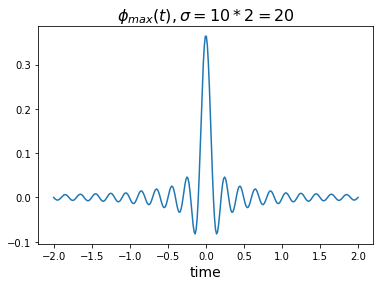

In [0]:
def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y = pi*where(x == 0,1.0e-20, x)
    return sin(2*W*y)/y

nstep=300                # quick and dirty integral quantization
t = linspace(-1,1,nstep) # quantization of time
tt = linspace(-2,2,nstep)# extend interval

w,v=eig(kernel_tau(t-tt[:,None],5))
ii = argsort(w.real) 
maxv=v[:, w.real.argmax()].real
fig,ax = subplots()
ax.plot(tt,maxv)
##plot(tt,v[:,ii[-2]].real)
ax.set_xlabel('time',fontsize=14)
ax.set_title('$\phi_{max}(t),\sigma=10*2=20$',fontsize=16)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)